In [1]:
# Calculations of accretion rates for Bondi-Hoyle-Lyttleton (BHL) 
# accretion model used in reference papaer M. Ricotti et al. 
# https://arxiv.org/abs/0709.0524 and Park Ricotti Model (PR)
# accretion model as per F. Scarcella et al. 2020, 
# https://arxiv.org/abs/2012.10421 . 


# Here, the value of the speed of sound in the ioinized region of 
# PR Model is chosen as c_s,in = 25 c_s. c_s,in is the free parameter 
# of PR accretion Model.


# The values of v_pbh, c_s and v_eff are used as per 
# M. Ricotti et al. 2007 https://arxiv.org/abs/0709.0524
 

# Here,  v_eff = v_eff,A as mentioned in
# M. Ricotti et al. 2007 https://arxiv.org/abs/0709.0524



from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from PRaccretion import*
from scipy.optimize import bisect, brentq, newton, root
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

def c_s(z):
    return c_s_Serpico(z)

def v_pbh(z):
    return v_L_Serpico(z)


def v_eff(z):
    return v_eff_Serpico(z)


def x_e(z):
    if z < z_rec:
        return e_fraction
    else:
        return 1
    

    
# BHL accretion Model around isolated PBHs 
def r_B_pbh(z, m):
    return (G * m)/(v_eff(z)**2)

 
# BHL accretion Model in the presence of DM halos around isolated PBHs  
def r_ta(z, m):
    if DM_densityprofile94 == True:
        return r_ta94(z, m)
    else:
        return r_ta32(z, m)

    
def M_halo(z, m):
    if DM_densityprofile94 == True:
        return M_halo94(z, m)
    else:
        return M_halo32(z, m)

    
def r_B_halo(z, m):
    return  (G * M_halo(z, m))/(v_eff(z)**2)




def r_B_eff(z, m):
    if r_ta(z, m) <= r_B_halo(z, m):
        r_B_eff_var =  (r_B_halo(z, m) + r_B_pbh(z, m))
    else:
        def a(z, m):
             return  (r_B_halo(z, m)/(1-p)) * (1/(r_ta(z, m)**p))

        def b(z, m):
            return 1  +   (p/(1-p)) * (r_B_halo(z, m)/r_ta(z, m))
        
        def c(z, m):
            return   r_B_pbh(z, m)
        
         
        #For, x = r_B,eff
        x_upper_limit = r_B_pbh(z, m) + r_B_halo(z, m)
        x_lower_limit = r_B_pbh(z, m)
        
        
        #def f(x): 
            #return (a(z, m) * (np.exp(x)**(p))) - b(z, m)*np.exp(x) + c(z, m)
        #roots = newton(lambda x: (a(z, m) * (np.exp(x)**(p))) - b(z, m)*np.exp(x) + c(z, m), x_upper_limit)
        #r_B_eff_var = np.exp(roots)
        
        
        roots = newton(lambda x: (a(z, m) * (x**p)) - b(z, m)*x + c(z, m), x_upper_limit)
        r_B_eff_var = roots
 

    return r_B_eff_var    




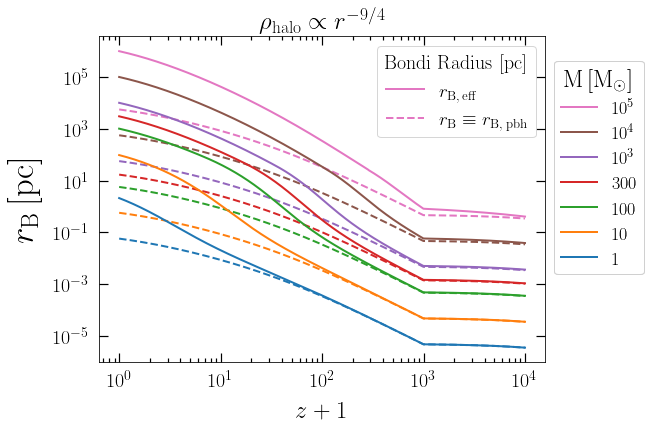

In [2]:
DM_densityprofile94 = True
alpha = 9/4
p = 3 - alpha


colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 1000)


r_B_pbh_arr = np.zeros(len(z_arr))
r_B_eff_arr = np.zeros(len(z_arr))




for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        r_B_pbh_arr[j] = r_B_pbh(z, m)
        r_B_eff_arr[j] = r_B_eff(z, m)
    ax.loglog(z_arr, r_B_eff_arr, color = color)
    ax.loglog(z_arr, r_B_pbh_arr, color = color, ls = '--')
    

    

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["$r_\mathrm{B, \,eff}$","$r_\mathrm{B}\equiv r_\mathrm{B, \,pbh}$"], title = 'Bondi Radius $ \mathrm{[pc]}$',
        title_fontsize = 20, loc = 'upper right', prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 24, loc = (1.02, 0.27), prop = {"size":18})
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.xlabel('$z+1$', fontsize = 24.5, labelpad = 10)
plt.ylabel(r"$r_\mathrm{B}\, \mathrm{[pc]}$ ", fontsize = 35, labelpad = 11)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.title(r'$\rho_\mathrm{halo} \propto r^{-9/4}$', fontsize = 25, pad = 8)
plt.savefig('r_B_BHL_eff94.pdf', bbox_inches = 'tight')
plt.show()

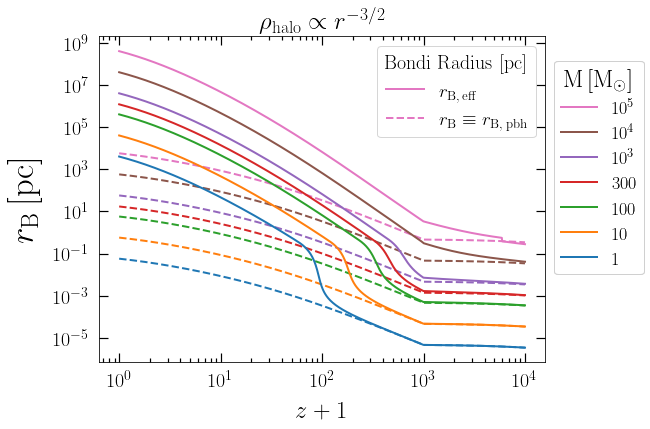

In [3]:
DM_densityprofile94 = False
alpha = 3/2
p = 3 - alpha


colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (8, 6))
plt.rc('lines', linewidth = 2)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



mi_arr = np.array([1e5, 1e4, 1000, 300, 100, 10, 1])
z_arr = np.geomspace(1, 1e4, 1000)


r_B_pbh_arr = np.zeros(len(z_arr))
r_B_eff_arr = np.zeros(len(z_arr))




for i, (m, color) in enumerate(zip(mi_arr, colors)):
    for j, z in enumerate(z_arr):
        r_B_pbh_arr[j] = r_B_pbh(z, m)
        r_B_eff_arr[j] = r_B_eff(z, m)
    ax.loglog(z_arr, r_B_eff_arr, color = color)
    ax.loglog(z_arr, r_B_pbh_arr, color = color, ls = '--')
    

    

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["$r_\mathrm{B, \,eff}$","$r_\mathrm{B}\equiv r_\mathrm{B, \,pbh}$"], title = 'Bondi Radius $ \mathrm{[pc]}$',
        title_fontsize = 20, loc = 'upper right', prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], ['$10^{5}$' ,  '$10^{4}$', '$10^{3}$', '$300$','$100$', '$10$','$1$']
                     , title = '$ \mathrm{M\, [M_{\odot}]}$',
           title_fontsize = 24, loc = (1.02, 0.27), prop = {"size":18})
ax.add_artist(legend1)
ax.add_artist(legend2)


plt.xlabel('$z+1$', fontsize = 24.5, labelpad = 10)
plt.ylabel(r"$r_\mathrm{B}\, \mathrm{[pc]}$ ", fontsize = 35, labelpad = 11)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.title(r'$\rho_\mathrm{halo} \propto r^{-3/2}$', fontsize = 25, pad = 8)
plt.savefig('r_B_BHL_eff32.pdf', bbox_inches = 'tight')
plt.show()